In [1]:
from fastai.tabular import *

# For learning

In [3]:
df = pd.read_csv('forecasts.csv'); df

,surfline_spot_id,name,timestamp,avg_height,swell1_height,swell1_period,swell1_is_favorable_direction,swell2_height,swell2_period,swell2_is_favorable_direction,swell3_height,swell3_period,swell3_is_favorable_direction
0,5842041f4e65fad6a770893f,Leo Carillo,2020-02-22 11:15:21.477666,2.50,0.56,12,N,0.36,11,Y,1.41,14,Y
1,584204214e65fad6a7709b9f,Malibu First Point,2020-02-22 11:15:21.477666,2.50,1.41,14,Y,0.36,12,N,0.30,11,Y
2,5842041f4e65fad6a770883c,Windansea,2020-02-22 11:15:21.477666,3.50,0.85,10,Y,0.52,8,Y,0.36,11,N
3,5842041f4e65fad6a7708805,Steamer Lane,2020-02-22 11:15:21.477666,4.25,2.20,5,Y,0.20,11,Y,6.50,12,N
4,5842041f4e65fad6a7708840,Sunset Cliffs,2020-02-22 11:15:21.477666,3.50,0.69,12,N,0.62,10,N,0.49,8,N
5,5842041f4e65fad6a770893f,Leo Carillo,2020-02-22 16:00:15.196466,2.50,0.56,12,N,0.69,10,N,0.36,11,Y
6,584204214e65fad6a7709b9f,Malibu First Point,2020-02-22 16:00:15.196466,2.50,0.36,10,N,1.41,14,Y,0.30,11,Y
7,5842041f4e65fad6a770883c,Windansea,2020-02-22 16:00:15.196466,3.00,0.85,10,Y,0.52,8,Y,0.36,11,N
8,5842041f4e65fad6a7708805,Steamer Lane,2020-02-22 16:00:15.196466,4.25,2.20,5,Y,0.20,11,Y,6.50,12,N
9,5842041f4e65fad6a7708840,Sunset Cliffs,2020-02-22 16:00:15.196466,3.00,0.69,12,N,0.62,10,N,0.49,8,N


In [3]:
rando_df = df.sample(frac=1).reset_index(drop=True); rando_df

,surfline_spot_id,name,timestamp,avg_height,swell1_height,swell1_period,swell1_is_favorable_direction,swell2_height,swell2_period,swell2_is_favorable_direction,swell3_height,swell3_period,swell3_is_favorable_direction
0,584204204e65fad6a77096b1,Ventura Point,2020-02-25 16:00:48.962124,2.50,1.21,6,Y,1.12,8,N,0.59,14,N
1,5842041f4e65fad6a7708840,Sunset Cliffs,2020-02-22 16:00:15.196466,3.00,0.69,12,N,0.62,10,N,0.49,8,N
2,5842041f4e65fad6a7708840,Sunset Cliffs,2020-02-25 16:00:48.962124,3.00,2.53,9,N,0.30,9,N,1.15,14,N
3,5842041f4e65fad6a7708805,Steamer Lane,2020-02-26 00:00:57.705783,4.50,7.22,12,Y,5.51,8,Y,0.20,16,N
4,5842041f4e65fad6a770883c,Windansea,2020-02-22 16:00:15.196466,3.00,0.85,10,Y,0.52,8,Y,0.36,11,N
5,5842041f4e65fad6a7708840,Sunset Cliffs,2020-02-24 00:02:20.251721,3.00,1.41,5,N,1.77,12,N,1.25,12,N
6,5842041f4e65fad6a770883c,Windansea,2020-02-22 11:15:21.477666,3.50,0.85,10,Y,0.52,8,Y,0.36,11,N
7,5842041f4e65fad6a7708840,Sunset Cliffs,2020-02-23 16:00:26.495821,3.00,1.41,5,N,1.77,12,N,1.25,12,N
8,5842041f4e65fad6a770883c,Windansea,2020-02-26 00:00:57.705783,2.50,2.43,8,Y,0.85,14,Y,0.59,12,Y
9,584204214e65fad6a7709b9f,Malibu First Point,2020-02-24 16:00:21.985921,2.50,1.15,6,Y,0.82,12,Y,1.35,8,N


In [4]:
dep_var = 'avg_height'
cat_names = ['swell1_is_favorable_direction', 'swell2_is_favorable_direction', 'swell3_is_favorable_direction']
cont_names = ['swell1_height', 'swell1_period', 'swell2_height', 'swell2_period', 'swell3_height', 'swell3_period']
procs = [FillMissing, Categorify, Normalize]

In [5]:
test = TabularList.from_df(rando_df.iloc[40:50].copy(), path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)

In [6]:
data = (TabularList.from_df(rando_df, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(40,50)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch(bs=5))

In [7]:
data.show_batch(rows=5)

swell1_is_favorable_direction,swell2_is_favorable_direction,swell3_is_favorable_direction,swell1_height,swell1_period,swell2_height,swell2_period,swell3_height,swell3_period,target
N,Y,N,3.3846,-0.2565,-0.1558,1.9093,2.5836,0.3960,5.0
Y,Y,N,-0.7321,0.4220,-0.1383,0.5825,-0.1973,-0.9859,1.5
N,N,N,-0.6015,1.1005,-0.4464,-0.0809,-0.4688,-0.9859,3.0
N,Y,Y,-0.6753,1.1005,-0.5975,0.2508,0.2882,1.0870,2.5
Y,N,Y,0.2559,-1.2742,2.9709,0.5825,-0.7073,0.0506,4.25


In [18]:
learn = tabular_learner(data, layers=[200,100], y_range=(60.0, 0.0), metrics=rmse)

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


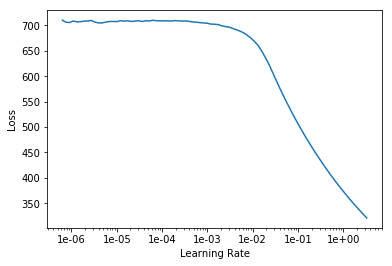

In [12]:
learn.recorder.plot()

In [ ]:
learn.fit(10, 1e-1)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,320.806030,10.133734,3.182485,00:00
1,152.424927,10.705177,3.270097,00:00
2,96.905388,10.706094,3.270235,00:00
3,69.522049,10.706213,3.270253,00:00


In [16]:
row = df.iloc[7]

In [17]:
learn.predict(row)

(FloatItem [8.818732e-10], tensor([8.8187e-10]), tensor([8.8187e-10]))

In [88]:
learn.save('stage-1')

In [96]:
learn.load('stage-1');

In [97]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


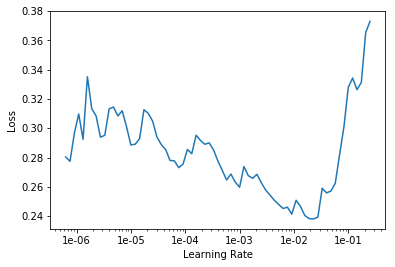

In [98]:
learn.recorder.plot()

In [99]:
learn.unfreeze()

In [100]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.464575,0.976322,0.979400,00:00
1,0.536393,1.015286,1.004299,00:00
2,0.478750,0.521314,0.716405,00:00
3,0.430538,0.824807,0.906296,00:00
4,0.347403,0.571498,0.749491,00:00


In [4]:
row = df.iloc[19]; row

surfline_spot_id                   5842041f4e65fad6a7708840
name                                          Sunset Cliffs
timestamp                        2020-02-23 16:00:26.495821
avg_height                                                3
swell1_height                                          1.41
swell1_period                                             5
swell1_is_favorable_direction                             N
swell2_height                                          1.77
swell2_period                                            12
swell2_is_favorable_direction                             N
swell3_height                                          1.25
swell3_period                                            12
swell3_is_favorable_direction                             N
Name: 19, dtype: object

In [95]:
learn.predict(row)

(FloatItem [2.96615], tensor([2.9662]), tensor([2.9662]))

In [101]:
learn.save('stage-2')

In [103]:
learn.load('stage-2');

In [104]:
learn.export()

# For production stuff

In [5]:
archives = [
    {
        'surfline_spot_id': '1',
        'name': 'Blah',
        'timestamp': 'Something',
        'swell1_height': 1.41,
        'swell1_period': 5,
        'swell1_is_favorable_direction': 'N',
        'swell2_height': 1.77,
        'swell2_period': 12,
        'swell2_is_favorable_direction': 'N',
        'swell3_height': 1.25,
        'swell3_period': 12,
        'swell3_is_favorable_direction': 'N'
    }
]

In [6]:
path = Path('.')

In [7]:
learn = load_learner(path)

In [17]:
df = pd.DataFrame.from_dict(archives); df

,name,surfline_spot_id,swell1_height,swell1_is_favorable_direction,swell1_period,swell2_height,swell2_is_favorable_direction,swell2_period,swell3_height,swell3_is_favorable_direction,swell3_period,timestamp
0,Blah,1,1.41,N,5,1.77,N,12,1.25,N,12,Something


In [18]:
row = df.iloc[0]; df

name                                  Blah
surfline_spot_id                         1
swell1_height                         1.41
swell1_is_favorable_direction            N
swell1_period                            5
swell2_height                         1.77
swell2_is_favorable_direction            N
swell2_period                           12
swell3_height                         1.25
swell3_is_favorable_direction            N
swell3_period                           12
timestamp                        Something
Name: 0, dtype: object

In [23]:
_, _, tensor = learn.predict(row); tensor

tensor([2.6723])

In [24]:
tensor.item()

2.6722583770751953